In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=2)

In [14]:
df = pd.read_csv("playerdata.csv", index_col=False)
df.head()

,date,id,gameid,team,player,minutes,fgm,fga,tpm,tpa,ftm,fta,oreb,dreb,assists,steals,blocks,turnovers,fouls,points
0,2018-11-02 00:00:00,230480,9046,brk,Joe Harris,31:59,7,9,4,4,0,0,0,2,4,0,0,0,4,18
1,2018-11-02 00:00:00,230481,9046,brk,Caris LeVert,30:15,10,17,4,6,5,7,1,3,2,3,1,1,5,29
2,2018-11-02 00:00:00,230482,9046,brk,Jarrett Allen,26:52,4,8,0,2,2,4,1,7,0,0,1,1,2,10
3,2018-11-02 00:00:00,230483,9046,brk,Jared Dudley,23:03,1,2,1,2,0,0,1,2,3,0,0,2,1,3
4,2018-11-02 00:00:00,230484,9046,brk,DAngelo Russell,22:26,5,14,1,5,1,2,1,2,3,0,0,1,0,12


In [15]:
df["date"] = pd.to_datetime(df.date)

In [31]:
#def player_summary(df, name):
name = "James Harden"

player_results = df[df["player"] == name]

player_results.points.describe()

count    57.000000
mean     36.842105
std      10.097364
min      15.000000
25%      30.000000
50%      37.000000
75%      43.000000
max      61.000000
Name: points, dtype: float64

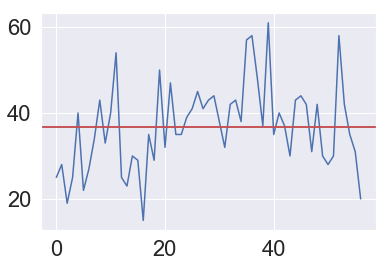

In [54]:
arr = []
for i in range(0,len(player_results)):
    arr.append(i)
    
sns.lineplot(x=arr, y = player_results.points.values)
plt.axhline(y = player_results.points.mean(),color='r')
plt.axhline(y = player_results.points.mean(),color='r')

In [55]:
# salary: 60,000
# 2 PG, 2 SG, 2 SF, 2 PF, 1 C

In [93]:
pool = pd.read_csv("fanduel.csv")

print(pool.shape)

pool = pool[pool["Injury Indicator"] != "O"]
pool = pool[pool.FPPG >  10]
pool.drop(columns=["First Name", "Last Name", "Played", "Injury Indicator", "Injury Details", "Tier", "Unnamed: 14", "Unnamed: 15"], inplace=True)

pool["Per_Dollar"] = pool.Salary / pool.FPPG

print(pool.shape)

(191, 16)
(124, 9)


In [94]:
pool.sort_values(by="Per_Dollar", ascending=False)

,Id,Position,Nickname,FPPG,Salary,Game,Team,Opponent,Per_Dollar
72,33427-16448,PF,Frank Kaminsky,11.977419,4500,CHA@HOU,CHA,HOU,375.706988
188,33427-23801,SG,Nik Stauskas,10.158491,3500,TOR@CLE,CLE,TOR,344.539360
177,33427-84706,PG,Devonte' Graham,10.243750,3500,CHA@HOU,CHA,HOU,341.671764
104,33427-85521,SF,Theo Pinson,10.250000,3500,DET@BKN,BKN,DET,341.463415
137,33427-58247,PG,Isaiah Whitehead,10.450000,3500,DET@BKN,DET,BKN,334.928236
116,33427-16197,SG,Chasson Randle,10.536364,3500,SAC@WAS,WAS,SAC,332.182905
100,33427-23810,SF,Jaron Blossomgame,10.559259,3500,TOR@CLE,CLE,TOR,331.462638
110,33427-9512,C,Nene,10.591429,3500,CHA@HOU,HOU,CHA,330.455883
121,33427-58457,SF,Devin Robinson,10.600000,3500,SAC@WAS,WAS,SAC,330.188667
171,33427-49114,SG,Frank Mason,10.694118,3500,SAC@WAS,SAC,WAS,327.282723


In [197]:
def position_players(df, position):
    frame = df[df.Position == position]
    frame.sort_values(by="FPPG", ascending=False)
    return frame

def player_value(df, player):
    
    rows = df[df["Nickname"] == player]
    
    if len(rows) == 0:
        return 0, 0
    
    row = rows.iloc[0]
    
    return row["Salary"], row["FPPG"]

def player_position(df, player):
    
    row = df[df["Nickname"] == player].iloc[0]
    
    return row["Position"]

def lineup_value(df, players, verbose = False):
    total_cost = 0
    total_points = 0
    
    for player in players:
        cost, points = player_value(df, player)
        if verbose:
            print(player,cost,points)
        total_cost += cost
        total_points += points
        
    return total_cost, total_points

In [149]:
summary = position_players(pool, "SF")
#print(summary.loc[:, ["Nickname","FPPG","Salary", "Per_Dollar"]])

In [193]:
lineup = [
    "Jeremy Lin",
    "Kemba Walker",
    "Alec Burks",
    "Caris LeVert",
    "Paul George",
    "Kawhi Leonard",
    "Jerami Grant",
    "Serge Ibaka",
    "Marc Gasol"
]

In [194]:
current_value = lineup_value(pool, lineup)
print(current_value)
max_value = current_value[1]
max_decision = "undecided"

for player in lineup:

    copy = lineup.copy()
    copy.remove(player)

    copy_value = lineup_value(pool, copy)


    position = player
    if player != "C" and player != "PF":
        position = player_position(pool, player)
    value = player_value(pool, player)

    #print(player,value)

    candidates = position_players(pool, position)

    for index,row in candidates.iterrows():
        if row.Nickname in copy:
            continue

        if (row.Salary + copy_value[0]) > 60000:
            continue

        new_value = copy_value[1] + row.FPPG

        if new_value > max_value:
            max_value = new_value
            max_decision = f"replace {player} with {row.Nickname}"
        
print(max_decision)

(59500, 294.35542696542058)
undecided


In [199]:
lineup = [
    "Ish Smith",
    "Collin Sexton",
    "James Harden",
    "Bradley Beal",
    "Royce O'Neale",
    "Nemanja Bjelica",
    "Bobby Portis",
    "Clint Capela",
    "Marquese Chriss"
]

lineup_value(pool, lineup, True)

Ish Smith 4900 17.7205121945
Collin Sexton 5400 22.7409094608
James Harden 12400 58.0809539311
Bradley Beal 10800 43.8582089552
Royce O'Neale 3500 13.4092303936
Nemanja Bjelica 4600 22.9803286693
Bobby Portis 6500 27.7794117647
Clint Capela 8000 39.2549019608
Marquese Chriss 0 0


(56100, 245.82445733003937)